In [154]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os

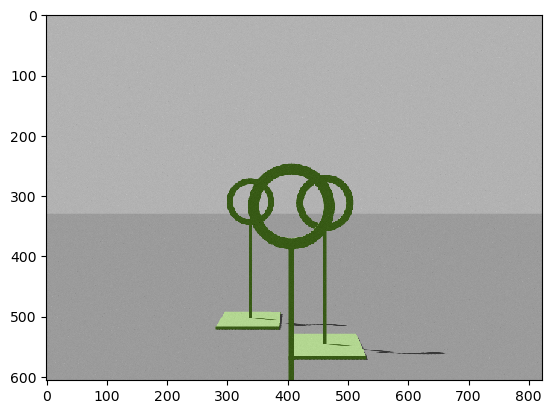

In [155]:
img = cv2.imread('images/image7.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

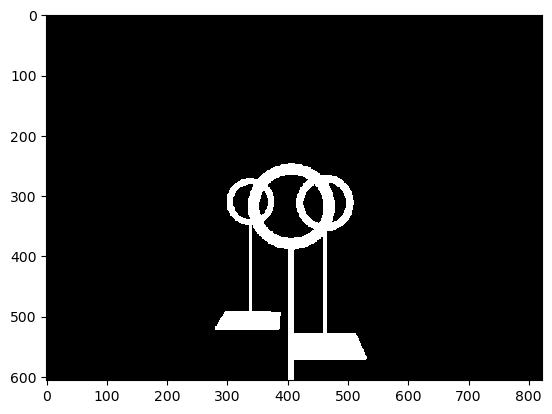

In [156]:
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
gates = cv2.inRange(img_hsv, (0, 20, 20), (179, 255, 255))
plt.imshow(gates, cmap='gray')
plt.show()

In [157]:
def largest_contour_with_child(img):
    contours, hierarchy = cv2.findContours(img, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)
    
    cont_arr = []
    for i, cont in enumerate(contours):
        # Has children?
        if hierarchy[0, i, 2] > -1:
            cont_arr.append(cont)
    
    if len(cont_arr) == 0:
        return []

    sizes = []
    for cont in cont_arr:
        sizes.append(cv2.contourArea(cont))

    largest = cont_arr[np.argmax(sizes)]
    return largest

def test_defects(cont):
    hull = cv2.convexHull(cont,returnPoints = False)
    hull_points = cv2.convexHull(cont,returnPoints = True)
    defects = cv2.convexityDefects(cont,hull)

    if  defects is None:
        print('defects none')
        return True
    
    furthest =  defects[:, :, 3]/256.0
    furthest = furthest.flatten()

    for dist in furthest:
        if dist > 0.03 * cv2.arcLength(hull_points, closed=True):
            return False

    return True


def sep_closest_gate2(img):
    kernel = np.ones((2,2),np.uint8)
    test_img = img.copy()
    index = 0
    for i in range(100):
        test_img = cv2.erode(test_img, kernel, iterations = 1)
        cont = largest_contour_with_child(test_img)

        if len(cont) == 0:
            index = i
            print('cont 0')
            break
        elif test_defects(cont):
            index = i + 1
            print('def')
            break
    
    for i in range(index):
        img = cv2.erode(img, kernel, iterations = 1)

    if i == 49:
        print('wtf')
    
    return img


def sides(img):
    top = 0
    bottom = 0
    left = 0
    right = 0

    if np.any(img[0, :]):
        top = 100
    if np.any(img[-1, :]):
        bottom = 100
    if np.any(img[:, 0]):
        left = 100
    if np.any(img[:, -1]):
        right = 100

    img = cv2.copyMakeBorder(img, top, bottom, left, right, cv2.BORDER_CONSTANT, value=255)
    #img = cv2.copyMakeBorder(img, top, bottom, left, right, cv2.BORDER_REFLECT, value=255)
    return img

def sides2(img):
    img = cv2.copyMakeBorder(img, 100, 100, 100, 100, cv2.BORDER_CONSTANT, value=0)
    # Top
    if np.any(img[100:-101, 100]):
        img[:, :100] = 255
    # Bottom
    if np.any(img[100:-101, -101]):
        img[:, -101:] = 255
    # Left
    if np.any(img[100, 100:-101]):
        img[:100, :] = 255
    #Right
    if np.any(img[-101, 100:-101]):
        img[-101:, :] = 255
    
    return img


def preprocess(filename):
    f = os.path.join('images', filename)
    img = cv2.imread(f)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    img = cv2.inRange(img, (0, 60, 20), (179, 255, 255))
    #img = cv2.morphologyEx(img, cv2.MORPH_OPEN, np.ones((3,3), np.uint8))
    img = sides2(img)

    return img

cont 0


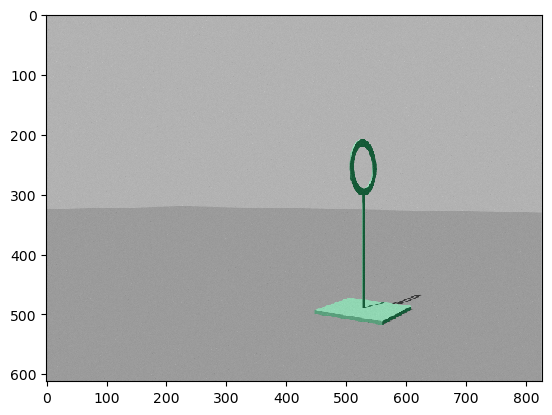

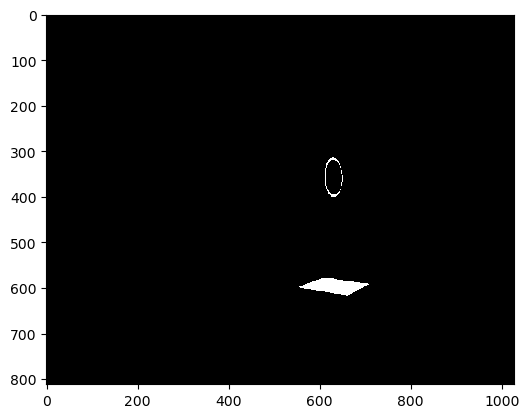

def


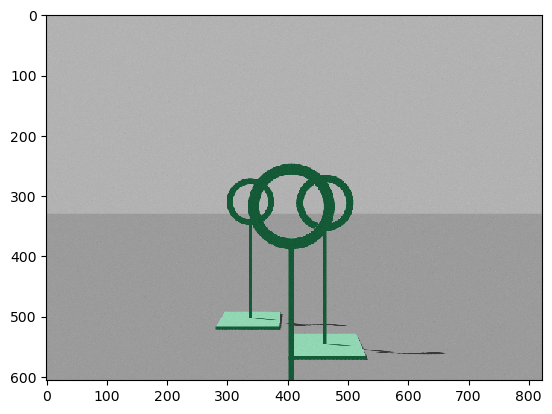

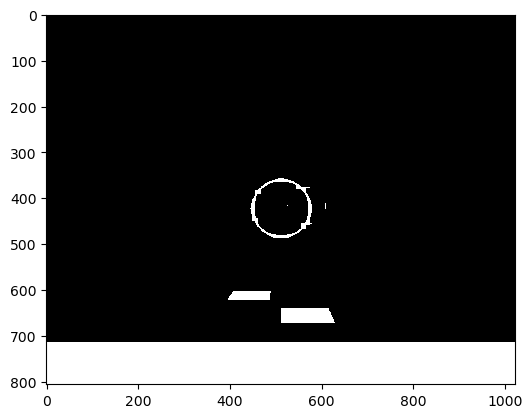

def


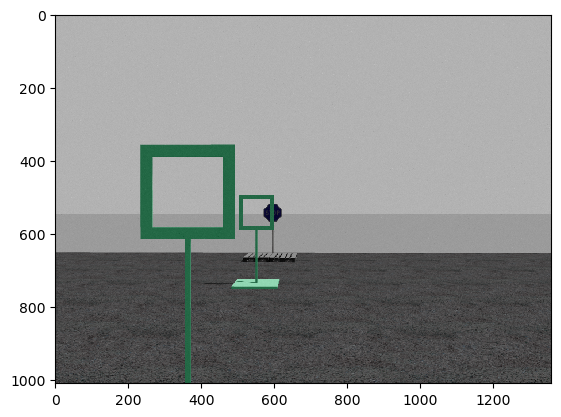

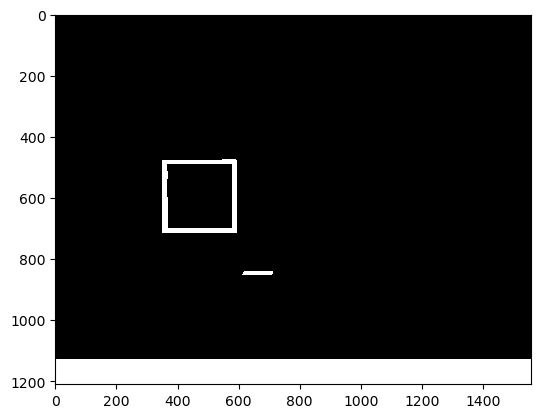

def


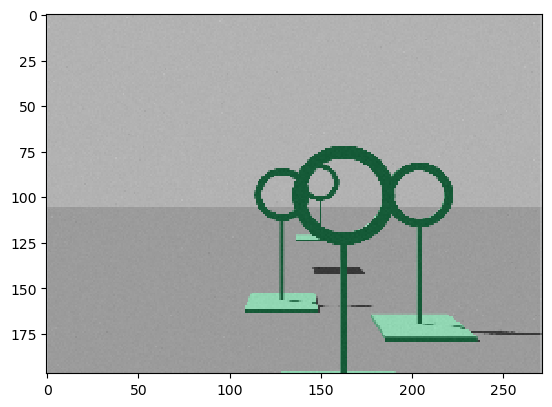

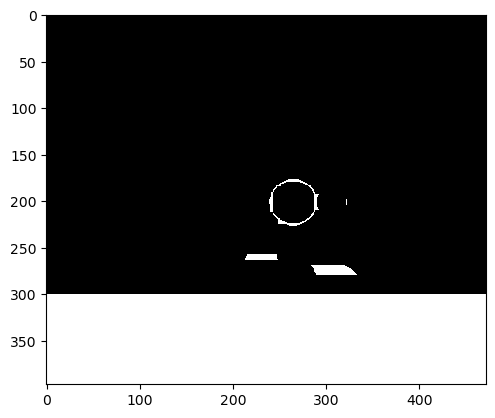

cont 0


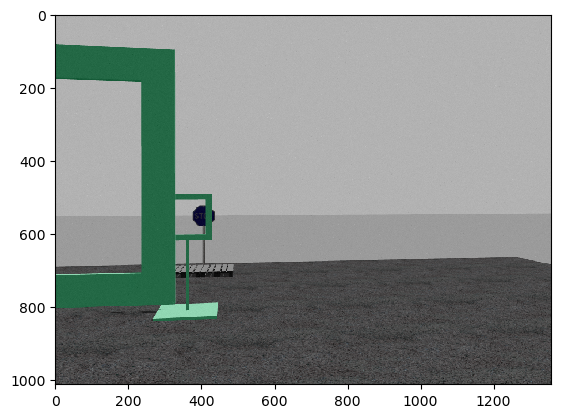

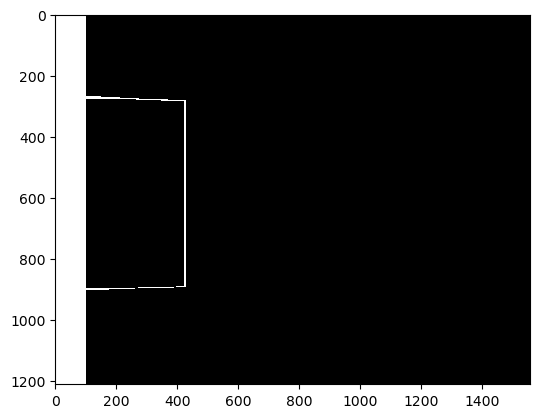

def


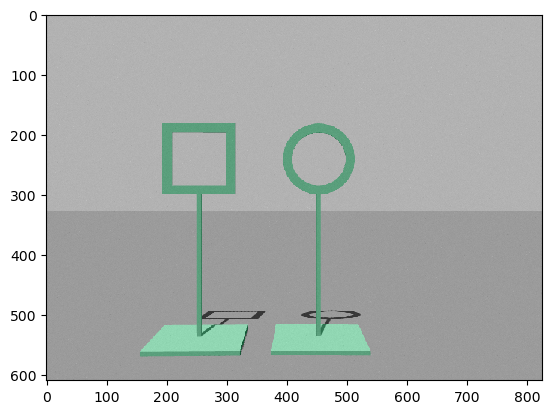

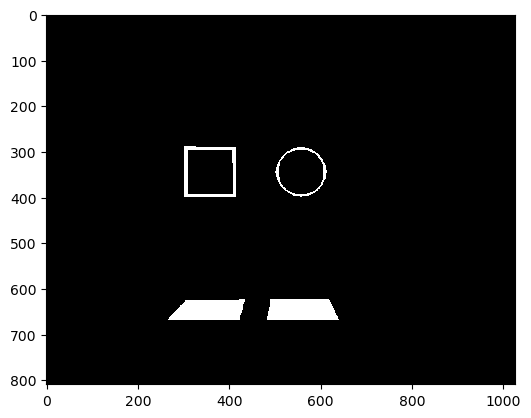

def


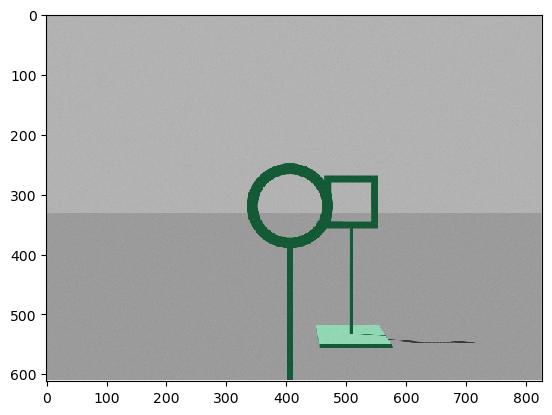

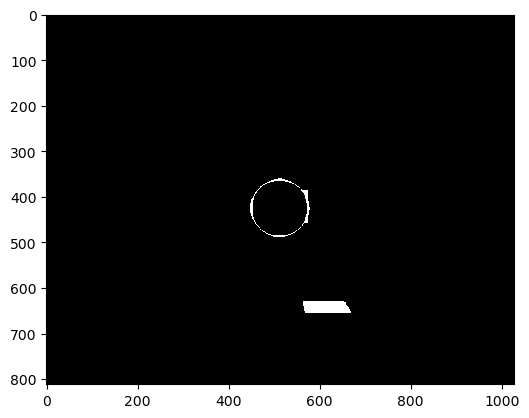

def


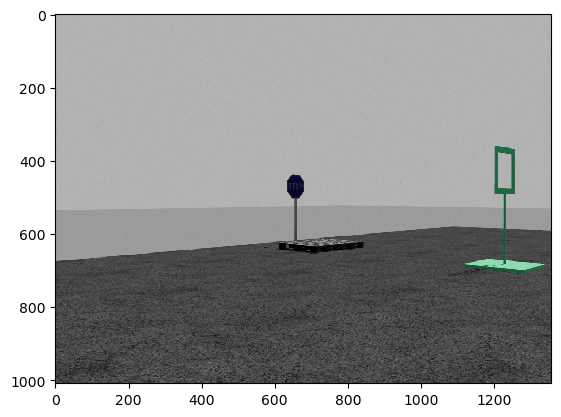

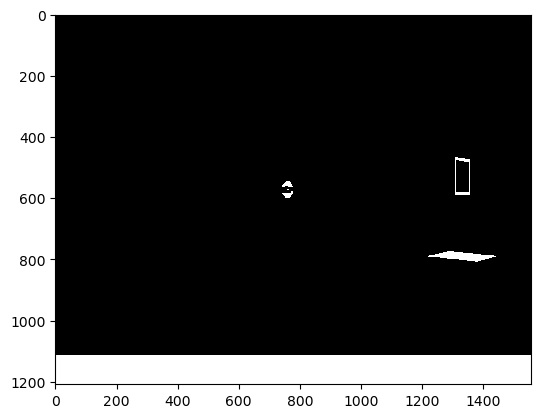

def


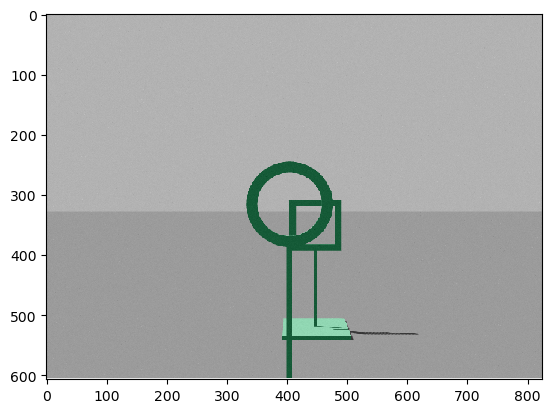

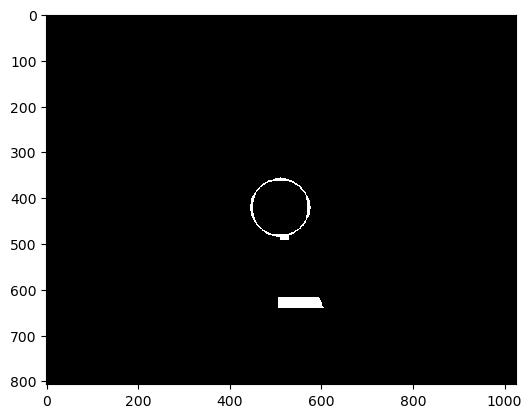

def


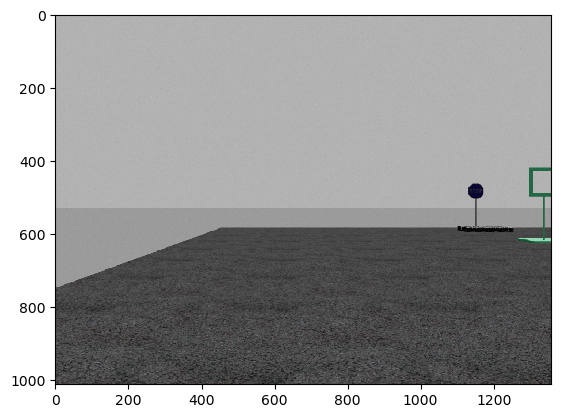

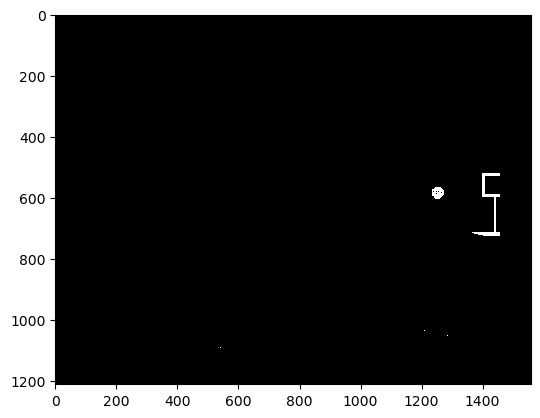

def


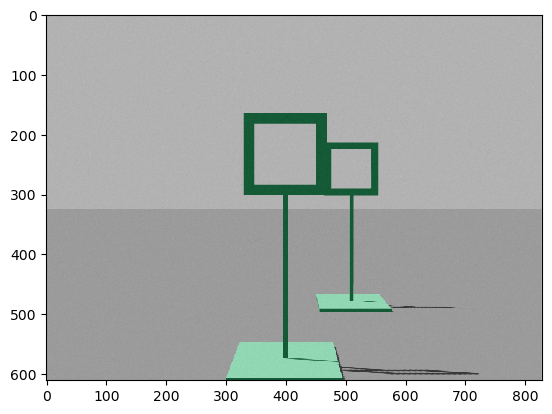

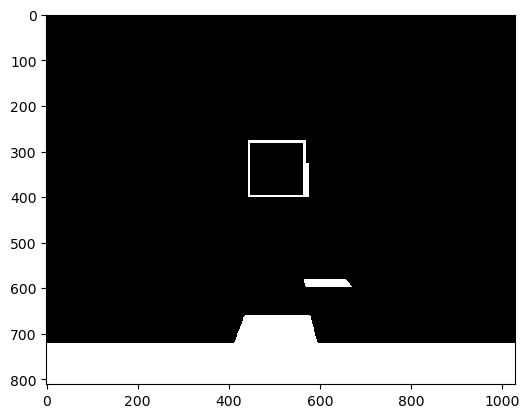

cont 0


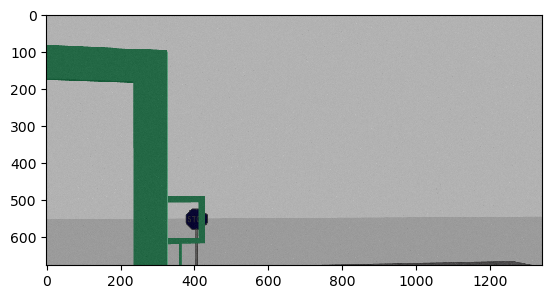

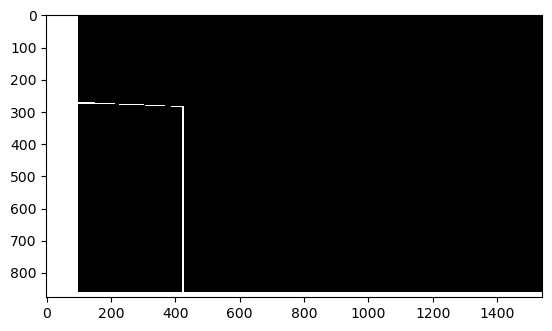

cont 0


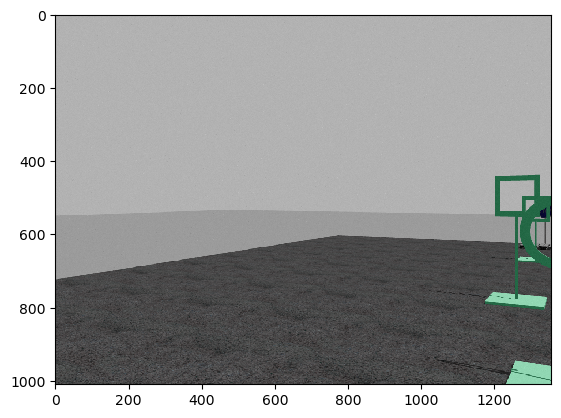

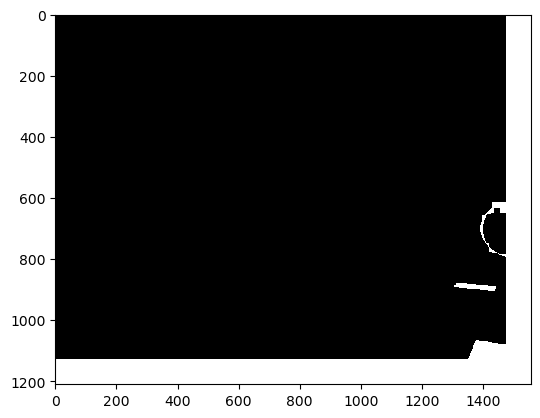

cont 0


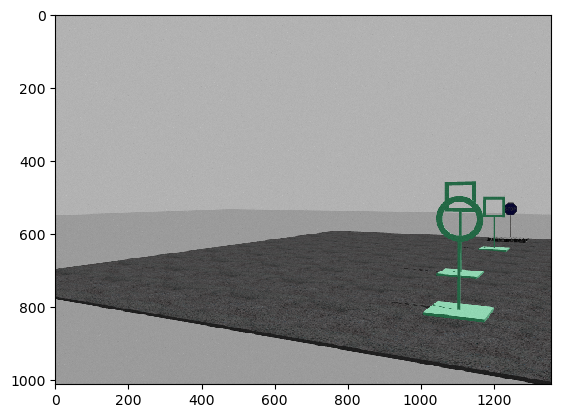

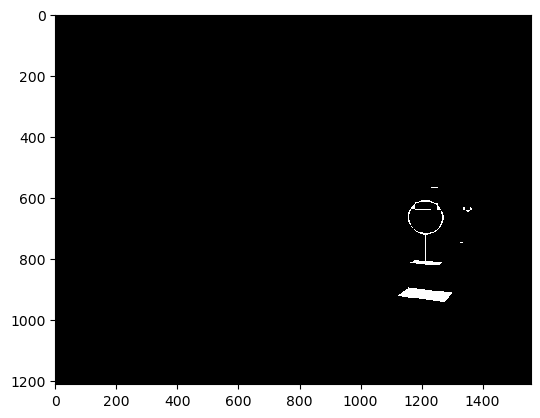

def


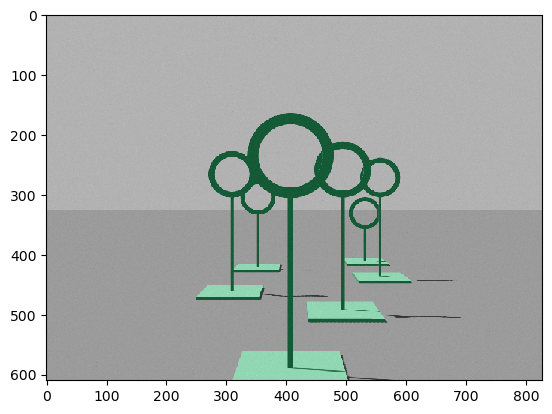

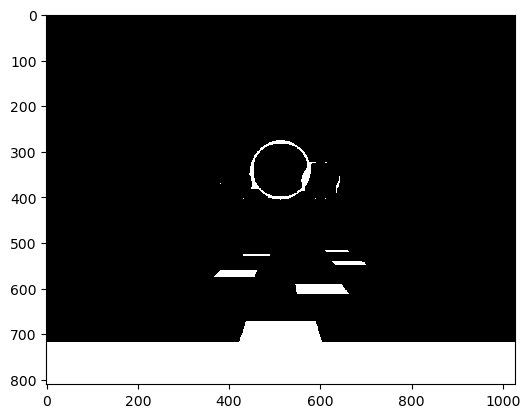

def


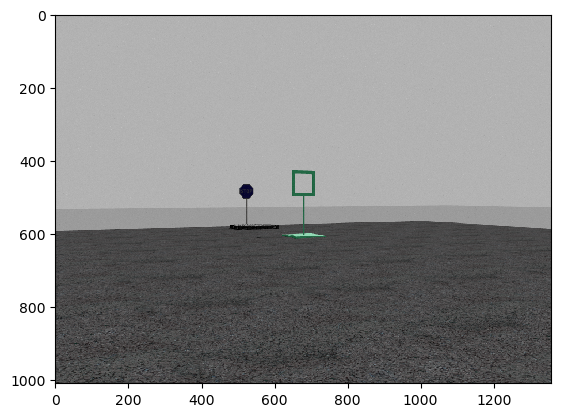

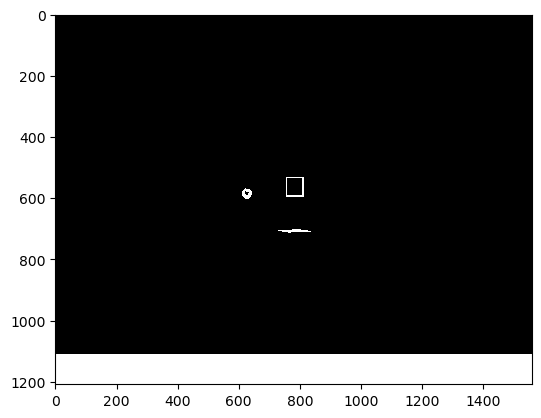

def


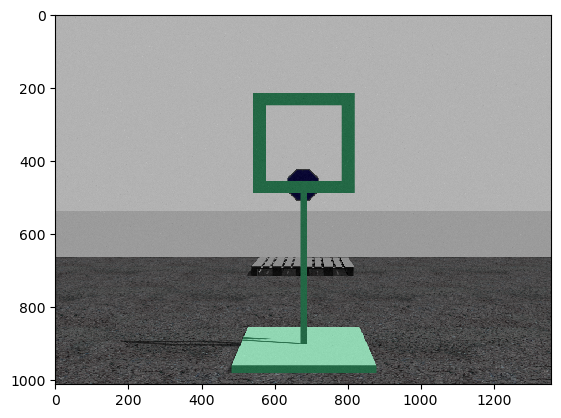

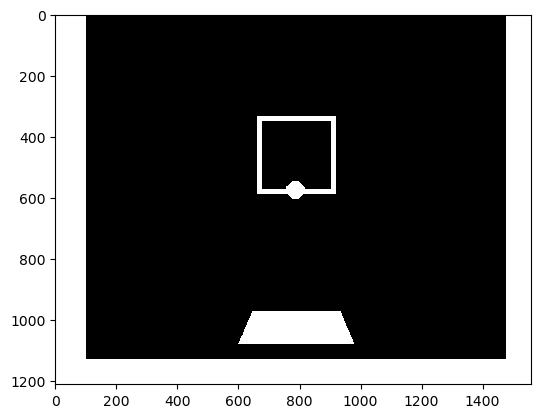

def


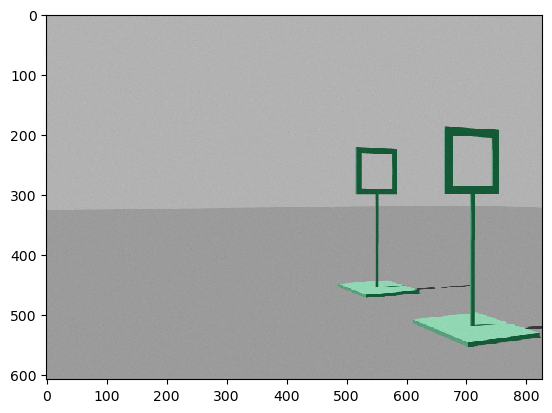

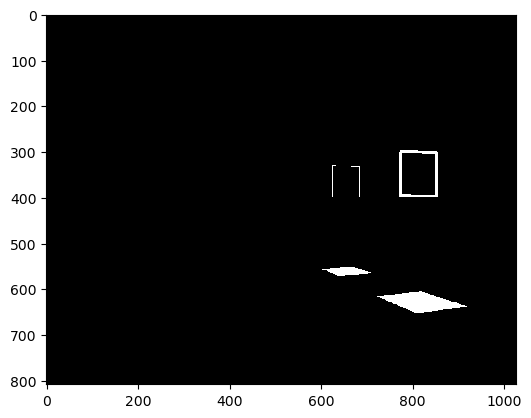

cont 0


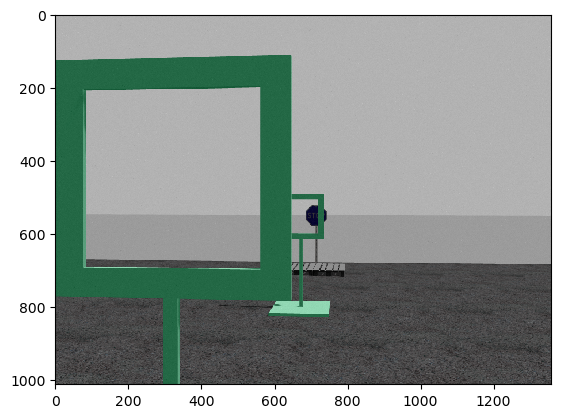

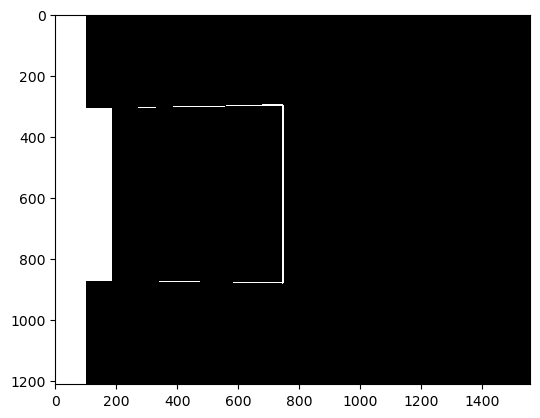

defects none
def


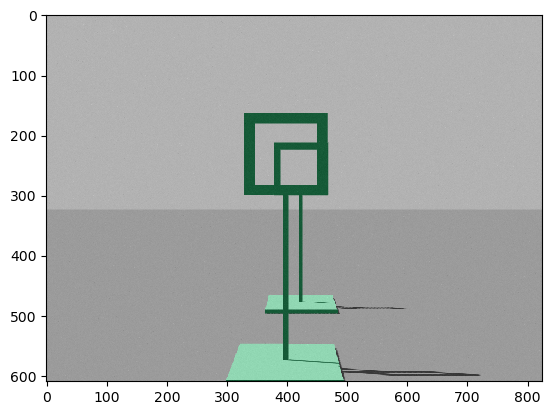

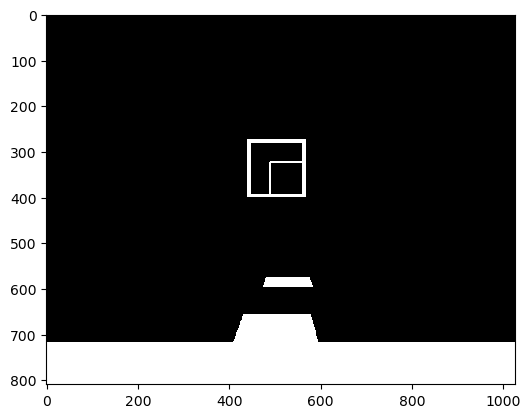

def


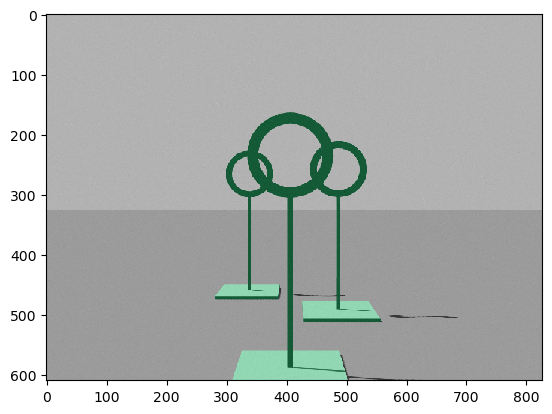

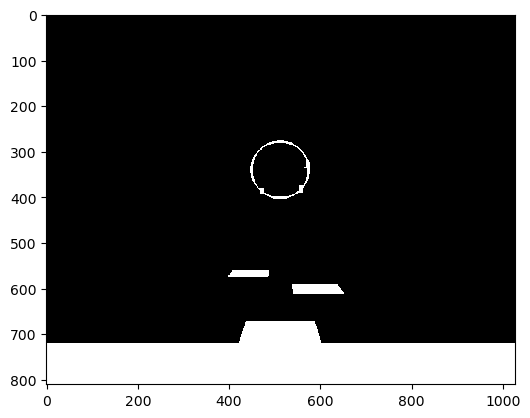

def


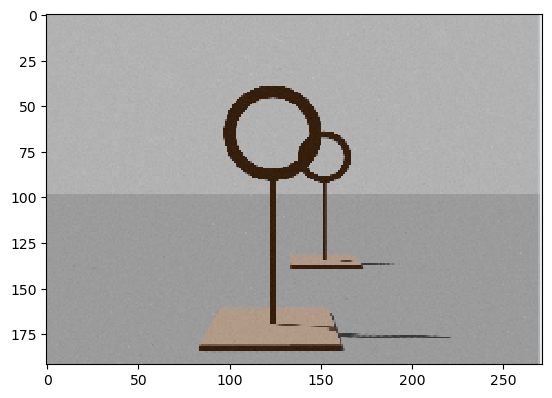

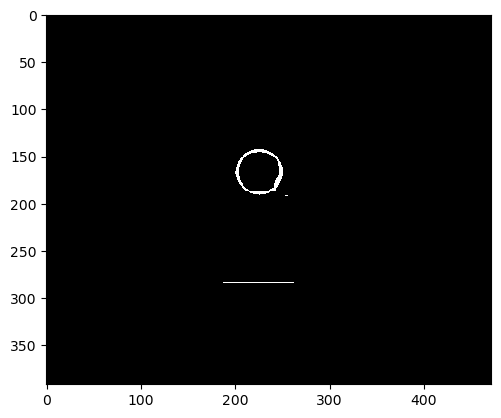

def


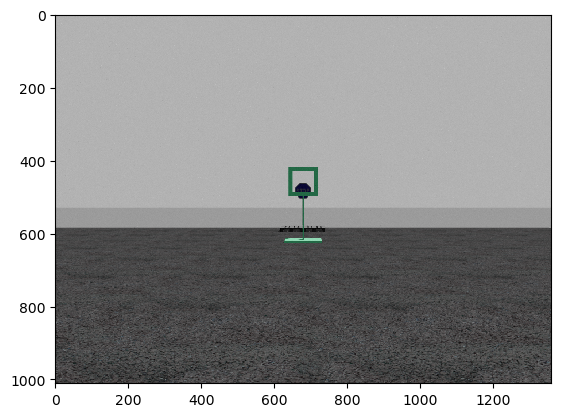

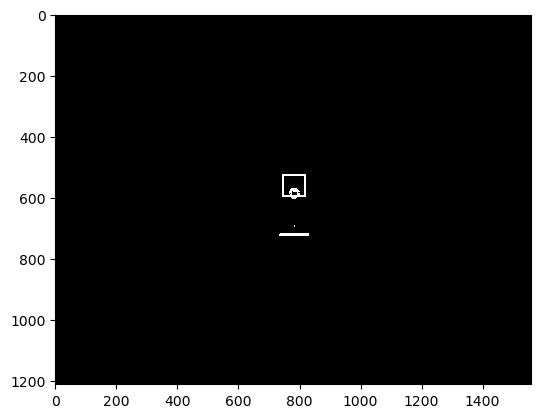

def


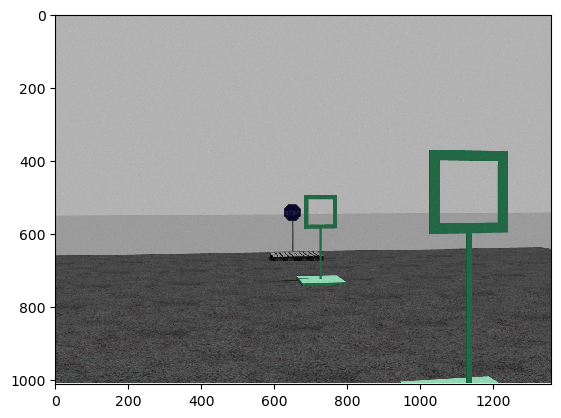

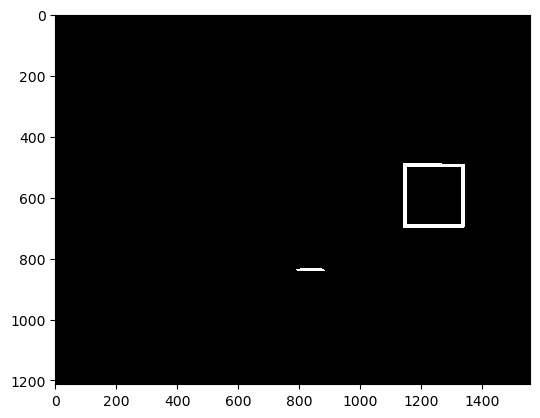

def


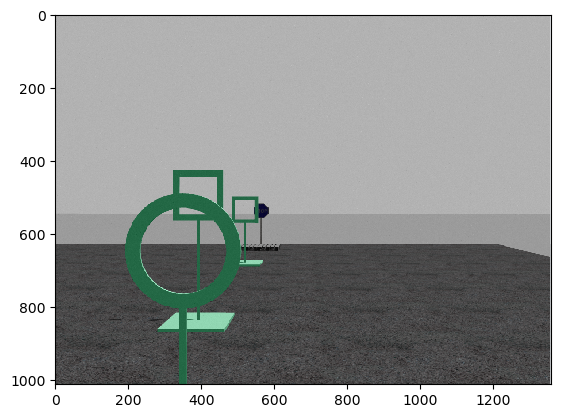

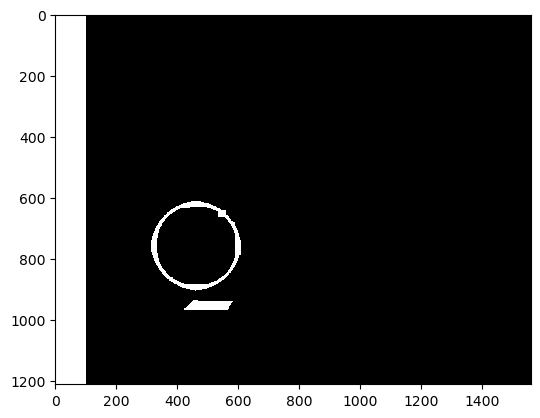

def


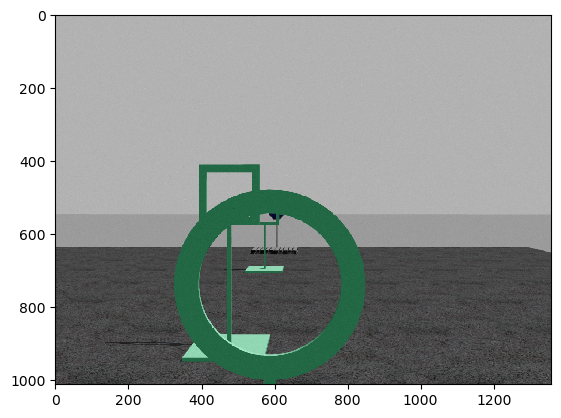

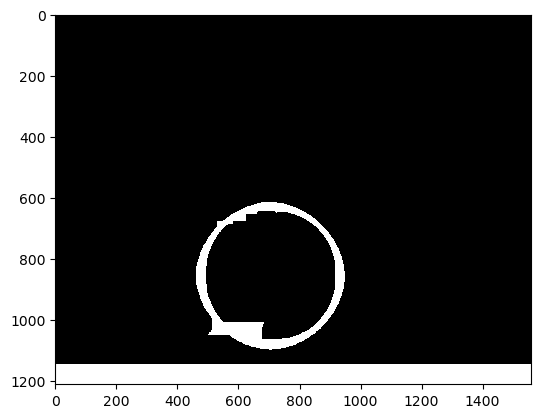

def


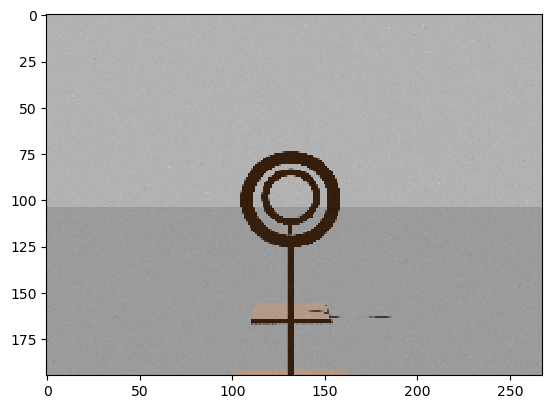

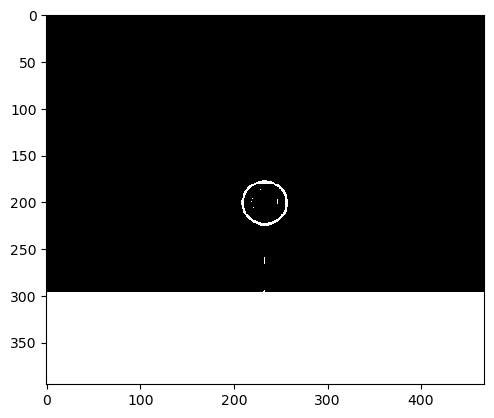

def


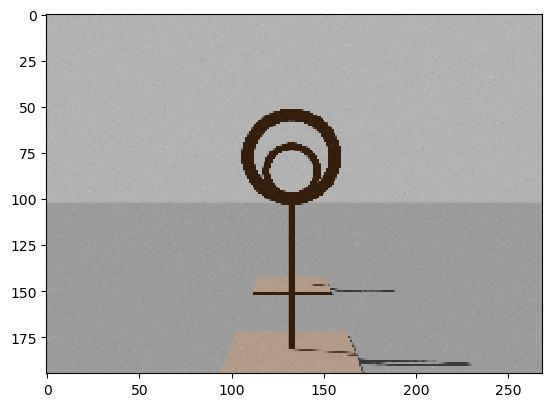

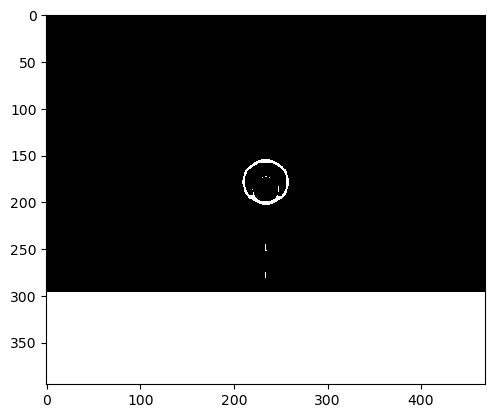

def


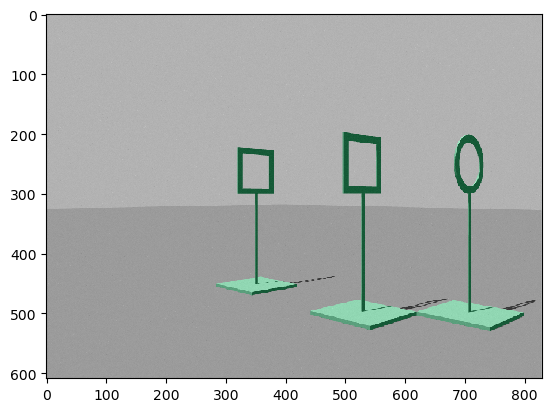

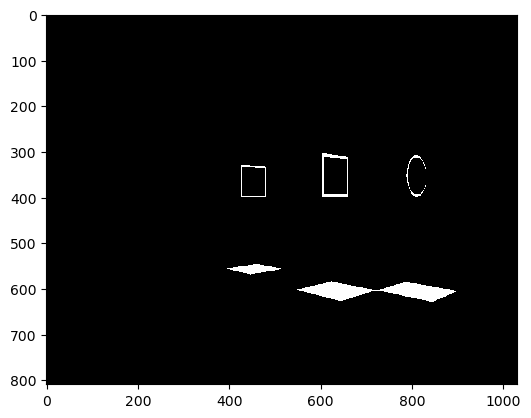

In [158]:
for filename in os.listdir('images'):
    f = os.path.join('images', filename)
    img = cv2.imread(f)
    gates = preprocess(filename)
    closest_gate = sep_closest_gate2(gates)
    plt.imshow(img)
    plt.show()
    plt.imshow(closest_gate, cmap='gray')
    plt.show()